In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [354]:
df= pd.read_excel("Chronic Kidney Disease Dataset.xls")

In [214]:
df

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,8815,32,1,white,1.0,0.0,1.0,DrHMO,1.0,80.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN
8815,8816,77,1,white,0.0,1.0,0.0,clinic,1.0,67.5,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN
8816,8817,56,1,white,0.0,0.0,NaN,DrHMO,1.0,49.0,...,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN
8817,8818,25,1,black,0.0,1.0,NaN,clinic,0.0,84.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN


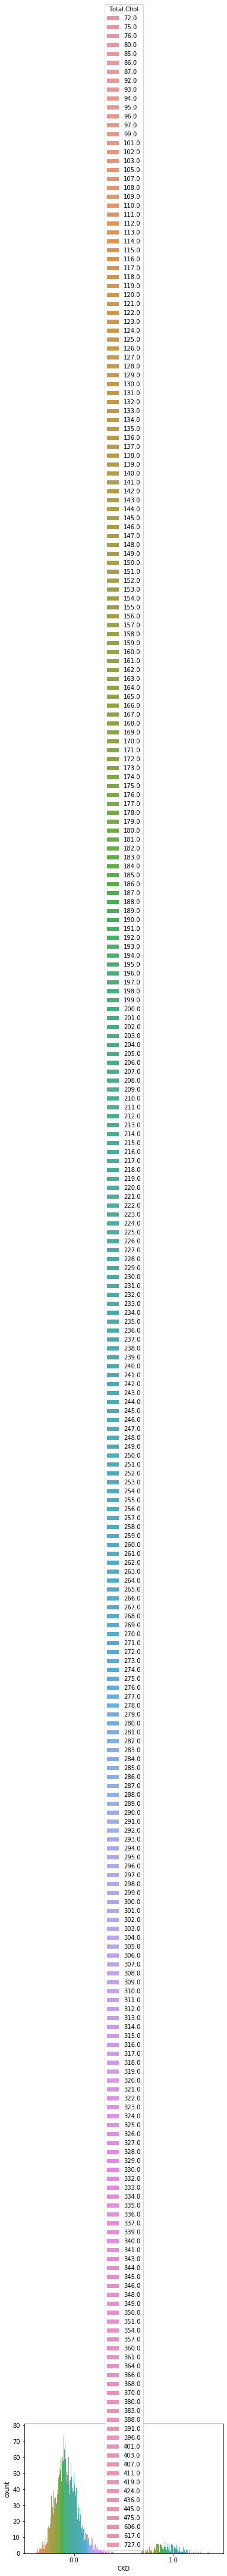

In [365]:
sns.countplot(x='CKD', hue = "Total Chol",data=df)
#plt.savefig("CKD vs Diabetes.png")

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


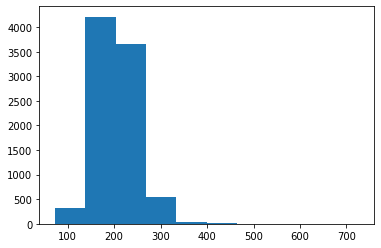

In [364]:
#CHeck normality
plt.hist(df['Total Chol'])
plt.savefig("Norm.png")

In [28]:
(df["Age"]).describe()

count    8819.000000
mean       49.358204
std        18.828726
min        20.000000
25%        33.000000
50%        47.000000
75%        65.000000
max        85.000000
Name: Age, dtype: float64

In [51]:
stats.ttest_ind(a=(df[df["CKD"] == 1])["SBP"], b= (df[df["CKD"] == 0])["SBP"], equal_var=False )

Ttest_indResult(statistic=nan, pvalue=nan)

In [52]:
pd.DataFrame(((df[df["CKD"] == 0])["Female"]).describe())

,Female
count,5536.000000
mean,0.520412
std,0.499628
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [331]:
df.dropna(inplace=True)
df.drop(['ID'], axis = 1, inplace=True)


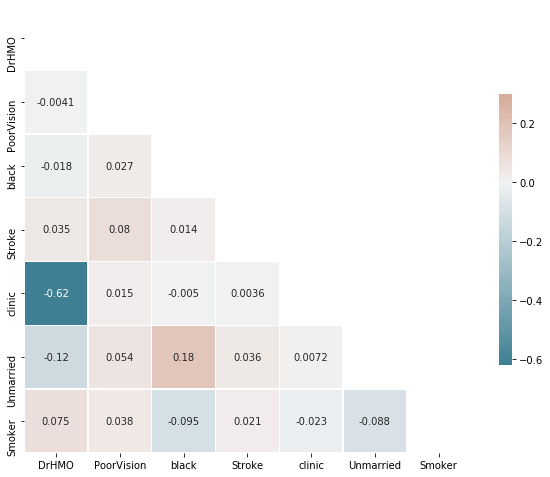

In [359]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df_cleaned[feat_cols_qual].corr(), dtype=bool))
sns.heatmap(df_cleaned[feat_cols_qual].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot_qual.png")

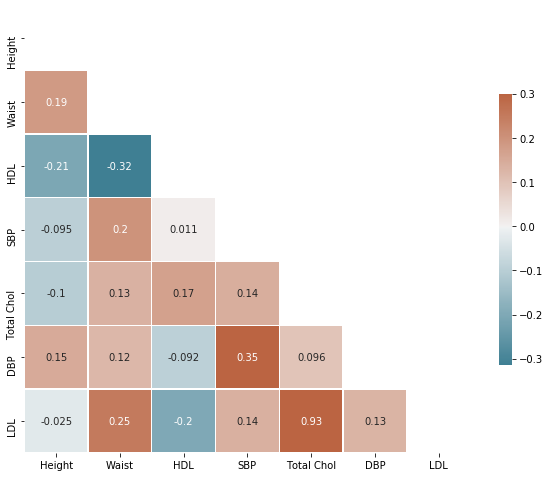

In [352]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df[feat_cols_qaunt].corr(), dtype=bool))
sns.heatmap(df[feat_cols_qaunt].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot_quant.png")`

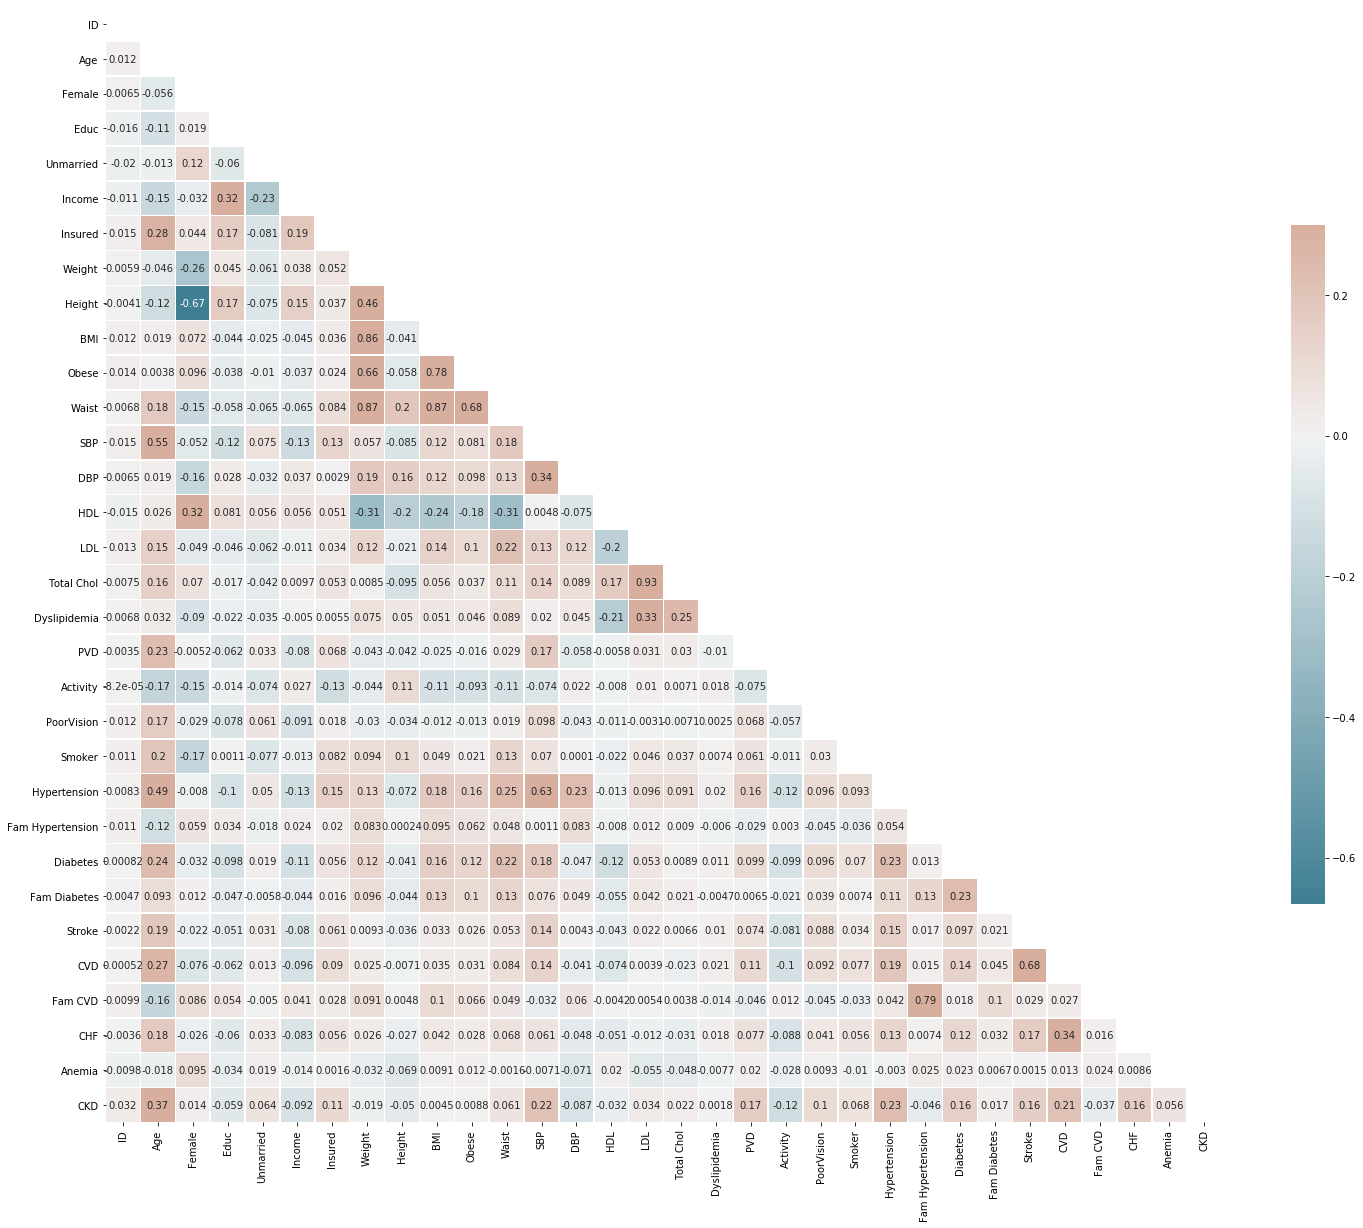

In [361]:
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

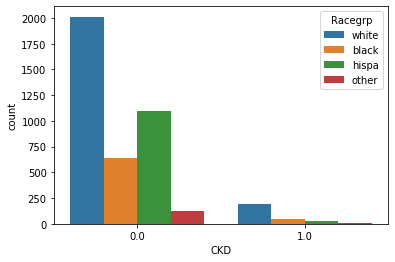

In [6]:
fig = sns.countplot(x='CKD', hue = "Racegrp",data=df)
plt.savefig("CKD vs RaceGrp.png")

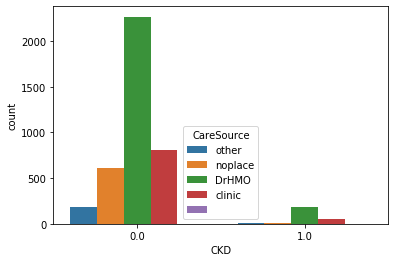

In [7]:
sns.countplot(x='CKD', hue = "CareSource",data=df)

plt.savefig("CKD vs Caresource.png")

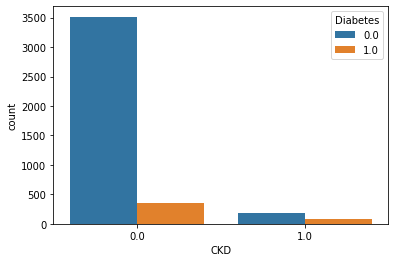

In [8]:
sns.countplot(x='CKD', hue = "Diabetes",data=df)
plt.savefig("CKD vs Diabetes.png")

In [235]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 5999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4136 non-null   int64  
 1   Female            4136 non-null   int64  
 2   Racegrp           4136 non-null   object 
 3   Educ              4136 non-null   float64
 4   Unmarried         4136 non-null   float64
 5   Income            4136 non-null   float64
 6   CareSource        4136 non-null   object 
 7   Insured           4136 non-null   float64
 8   Weight            4136 non-null   float64
 9   Height            4136 non-null   float64
 10  BMI               4136 non-null   float64
 11  Obese             4136 non-null   float64
 12  Waist             4136 non-null   float64
 13  SBP               4136 non-null   float64
 14  DBP               4136 non-null   float64
 15  HDL               4136 non-null   float64
 16  LDL               4136 non-null   float64


In [332]:
Racegrp = pd.get_dummies(df["Racegrp"])#, drop_first=True)
Racegrp.rename(columns = {"other":"Other_races"}, inplace=True)
CareSource = pd.get_dummies(df["CareSource"])
CareSource.rename(columns = {"other":"Other_CareSource"}, inplace=True)

In [333]:
df_cleaned = pd.concat([df,Racegrp,CareSource], axis=1)
df_cleaned.drop(["Racegrp","CareSource"," "], axis= 1, inplace=True)

In [356]:
df_cleaned

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,...,Anemia,CKD,black,hispa,Other_races,white,DrHMO,clinic,noplace,Other_CareSource
0,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,0.0,...,0.0,0.0,0,0,0,1,0,0,0,1
2,66,1,0.0,1.0,0.0,1.0,83.9,162.5,31.77,1.0,...,0.0,0.0,0,0,0,1,0,0,1,0
3,54,1,1.0,0.0,0.0,1.0,69.4,160.5,26.94,0.0,...,0.0,0.0,0,0,0,1,1,0,0,0
5,26,0,1.0,0.0,0.0,1.0,119.3,193.2,31.96,1.0,...,0.0,0.0,0,0,0,1,1,0,0,0
6,66,0,1.0,0.0,0.0,0.0,85.1,172.1,28.73,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,0,0.0,0.0,0.0,1.0,109.3,185.8,31.66,1.0,...,0.0,1.0,0,0,0,1,1,0,0,0
5996,49,0,0.0,0.0,1.0,1.0,86.6,168.9,30.36,1.0,...,0.0,0.0,0,0,0,1,1,0,0,0
5997,30,0,1.0,1.0,0.0,1.0,78.0,174.9,25.50,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
5998,75,0,0.0,1.0,0.0,1.0,78.8,176.5,25.30,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0


In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('CKD',axis=1), 
                                                    df_cleaned['CKD'], test_size=0.30, 
                                                    random_state=101)

In [336]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [337]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1154
         1.0       0.65      0.15      0.24        87

    accuracy                           0.93      1241
   macro avg       0.79      0.57      0.60      1241
weighted avg       0.92      0.93      0.92      1241

[[1147    7]
 [  74   13]]


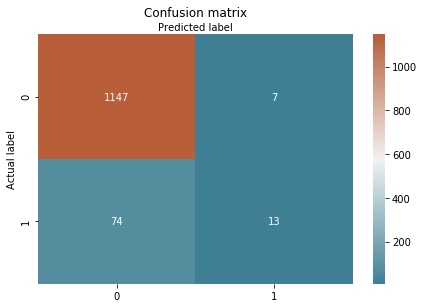

In [338]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr1.png")

In [339]:
coef = (logmodel.coef_)[0]
labels = df_cleaned.drop(["CKD"], axis=1).columns

In [340]:
logmodel.intercept_

array([-0.03861665])

In [341]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR1.csv")

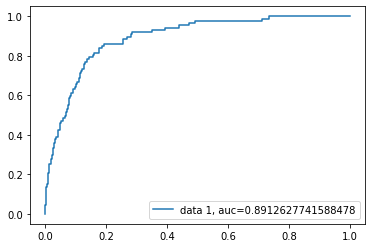

In [342]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [343]:
len(coef)

38

In [346]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)
results.sort_values(by='coef', inplace=True)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


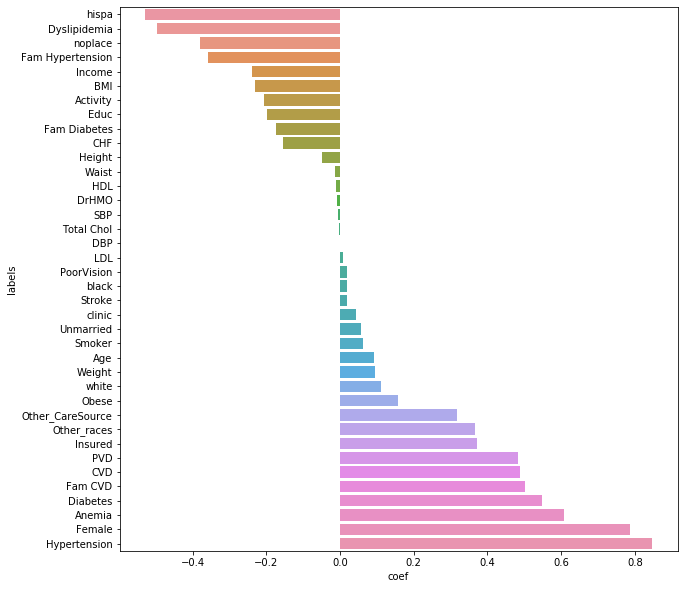

In [347]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot.png")

In [171]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [290]:
feat_cols_qaunt = ["Height",
'Waist',
'HDL',
'SBP',
'Total Chol',
'DBP',
'LDL'
]

feat_cols_qual = ['DrHMO',"PoorVision",'black',
'Stroke',
'clinic',
'Unmarried',
'Smoker']

In [292]:
df_cleaned[feat_cols_qaunt]

,Height,Waist,HDL,SBP,Total Chol,DBP,LDL
0,162.1,83.6,48.0,135.0,297.0,71.0,249.0
2,162.5,113.2,44.0,115.0,255.0,57.0,211.0
3,160.5,77.9,74.0,110.0,230.0,57.0,156.0
5,193.2,117.9,43.0,129.0,202.0,70.0,159.0
6,172.1,99.2,41.0,137.0,184.0,92.0,143.0
...,...,...,...,...,...,...,...
5995,185.8,117.2,33.0,149.0,222.0,77.0,189.0
5996,168.9,99.5,38.0,130.0,161.0,75.0,123.0
5997,174.9,89.2,40.0,126.0,171.0,83.0,131.0
5998,176.5,100.4,58.0,129.0,192.0,50.0,134.0


In [293]:
df2 = df_cleaned.copy()

In [294]:
df2.drop(feat_cols,axis=1, inplace=True)

In [297]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned[feat_cols_qaunt].values)
df2['pca-one'] = pca_result[:,0]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned[feat_cols_qual].values)
df2['pca-two'] = pca_result[:,0]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73757037 0.09538427]
Explained variation per principal component: [0.32329959 0.23078951]


In [298]:
df2

,Age,Female,Educ,Income,Insured,Weight,BMI,Obese,Dyslipidemia,PVD,...,CHF,Anemia,CKD,hispa,Other_races,white,noplace,Other_CareSource,pca-one,pca-two
0,65,1,0.0,1.0,1.0,56.0,21.31,0.0,0,0,...,0.0,0.0,0.0,0,0,1,0,1,133.649306,0.138015
2,66,1,0.0,0.0,1.0,83.9,31.77,1.0,1,0,...,0.0,0.0,0.0,0,0,1,1,0,77.453513,0.383704
3,54,1,1.0,0.0,1.0,69.4,26.94,0.0,0,0,...,0.0,0.0,0.0,0,0,1,0,0,18.591324,-0.639996
5,26,0,1.0,0.0,1.0,119.3,31.96,1.0,0,0,...,0.0,0.0,0.0,0,0,1,0,0,4.540099,-0.476995
6,66,0,1.0,0.0,0.0,85.1,28.73,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,-19.168078,-0.415171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,0,0.0,0.0,1.0,109.3,31.66,1.0,0,0,...,0.0,0.0,1.0,0,0,1,0,0,41.218431,-0.639996
5996,49,0,0.0,1.0,1.0,86.6,30.36,1.0,0,0,...,0.0,0.0,0.0,0,0,1,0,0,-50.229836,-0.476995
5997,30,0,1.0,0.0,1.0,78.0,25.50,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,-38.214088,1.159777
5998,75,0,0.0,0.0,1.0,78.8,25.30,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,-21.577517,-0.332483


In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('CKD',axis=1), 
                                                    df2['CKD'], test_size=0.30, 
                                                    random_state=101)

In [302]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [303]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.78      0.16      0.27        87

    accuracy                           0.94      1241
   macro avg       0.86      0.58      0.62      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  73   14]]


In [304]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1154
         1.0       0.78      0.16      0.27        87

    accuracy                           0.94      1241
   macro avg       0.86      0.58      0.62      1241
weighted avg       0.93      0.94      0.92      1241

[[1150    4]
 [  73   14]]


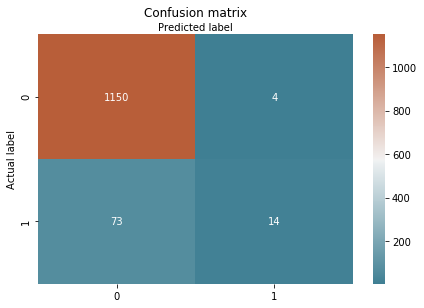

In [324]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("confmatr2.png")

In [320]:
coef = (logmodel.coef_)[0]
labels = df2.drop(["CKD"], axis=1).columns

In [307]:
logmodel.intercept_

array([-9.61364456])

In [308]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR2.csv")

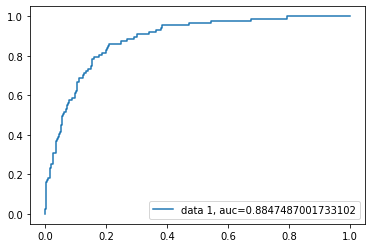

In [309]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [322]:
results= {'coef':coef, 'labels':labels}
results = pd.DataFrame(results)
results.sort_values(by='coef', inplace=True)

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


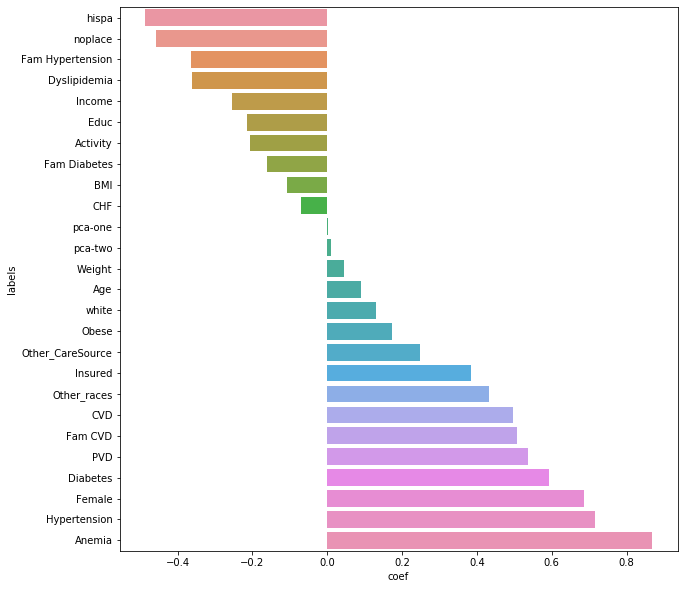

In [323]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot 2.png")

ValueError: arrays must all be same length

AttributeError: 'dict' object has no attribute 'sort_values'

In [316]:
results

{'coef': array([ 0.08936804,  0.68507337, -0.21529123, -0.25405662,  0.38292781,
         0.04590815, -0.1089015 ,  0.17168805, -0.36182918,  0.53778003,
        -0.20666003,  0.71432538, -0.36327504,  0.5913899 , -0.16093257,
         0.49581512,  0.50765255, -0.06935749,  0.86847546, -0.48748923,
         0.43147167,  0.12916026, -0.45760442,  0.24844355,  0.00204706,
         0.00983897]),
 'labels': Index(['Age', 'Female', 'Educ', 'Unmarried', 'Income', 'Insured', 'Weight',
        'Height', 'BMI', 'Obese', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL',
        'Total Chol', 'Dyslipidemia', 'PVD', 'Activity', 'PoorVision', 'Smoker',
        'Hypertension', 'Fam Hypertension', 'Diabetes', 'Fam Diabetes',
        'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia', 'black', 'hispa',
        'Other_races', 'white', 'DrHMO', 'clinic', 'noplace',
        'Other_CareSource'],
       dtype='object')}

Text(0.5, 257.44, 'Predicted label')

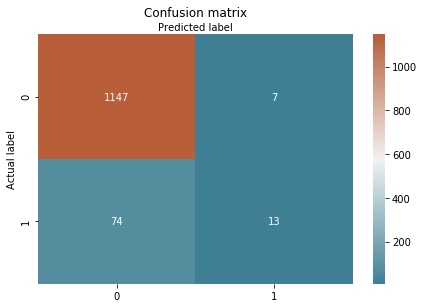

In [103]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
coef = (logmodel.coef_)[0]

In [91]:
logmodel.intercept_

array([-0.03861665])

In [282]:
y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR1.csv")

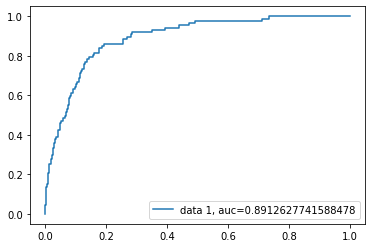

In [93]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [105]:
len(coef)

38

In [112]:
labels = df_cleaned.drop(["CKD"], axis=1).columns

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


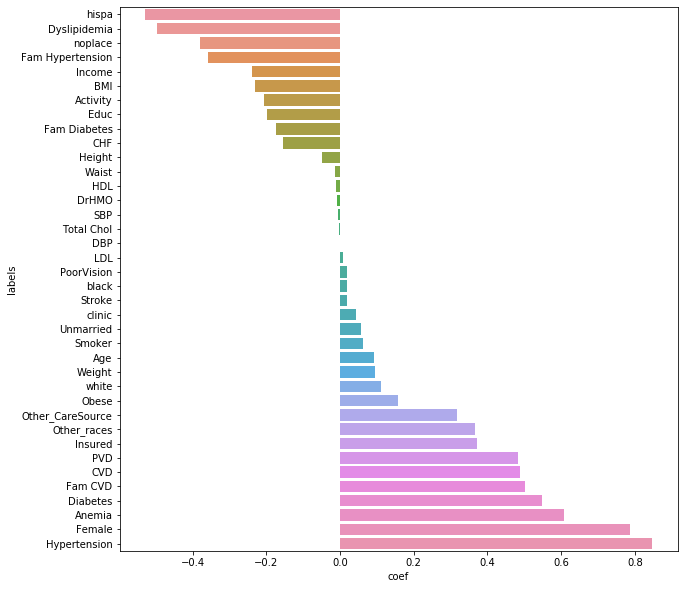

In [156]:

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot.png")

In [145]:
results= {'coef':coef, 'labels':labels}

In [147]:
results = pd.DataFrame(results)

In [152]:
results.sort_values(by='coef', inplace=True)

In [153]:
results

,coef,labels
31,-0.529086,hispa
16,-0.496770,Dyslipidemia
36,-0.379087,noplace
22,-0.358998,Fam Hypertension
4,-0.239562,Income
8,-0.230715,BMI
18,-0.206382,Activity
2,-0.198088,Educ
24,-0.174367,Fam Diabetes
28,-0.154726,CHF


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

coef = (logmodel.coef_)[0]

logmodel.intercept_

y_pred_proba=logmodel.predict_proba(X_test)

LR1=pd.DataFrame(y_pred_proba)
LR1.rename(columns = {"0":"prob0_LR1","1":"prob1_LR1"},inplace=True)
LR1.to_csv("LR1.csv")

y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

len(coef)

labels = df_cleaned.drop(["CKD"], axis=1).columns


f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot( results['coef'],results['labels'], orient="h")
plt.savefig("coef plot.png")

results= {'coef':coef, 'labels':labels}

results = pd.DataFrame(results)

results.sort_values(by='coef', inplace=True)

results